In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf,plot_predict
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df=pd.read_csv('/content/exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
print(df.shape)
print(df.columns)

(7588, 2)
Index(['date', 'Ex_rate'], dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [7]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [8]:
df.isnull().sum()


,0
date,0
Ex_rate,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.set_index('date',inplace=True)
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


**Intial Exploartion**

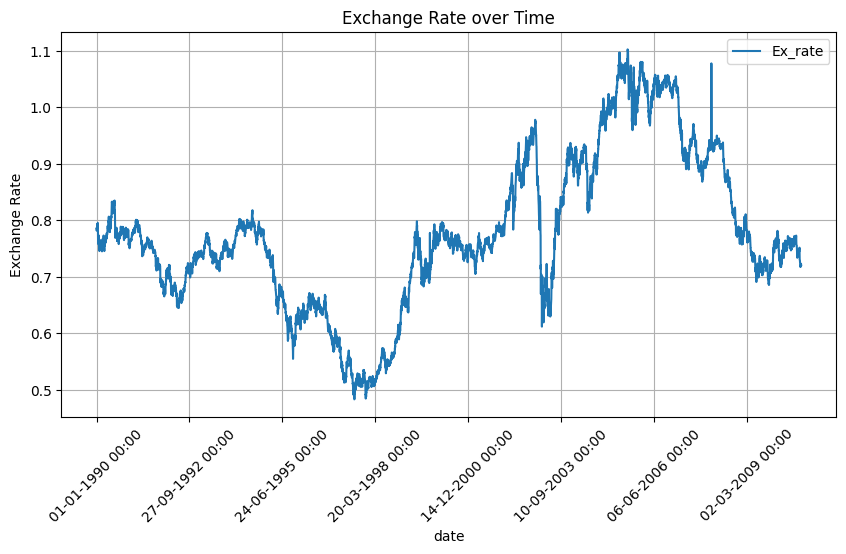

In [14]:
df.plot(figsize=(10,5))
plt.title('Exchange Rate over Time')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [18]:
decompose=seasonal_decompose(df['Ex_rate'], model='additive', period=12)


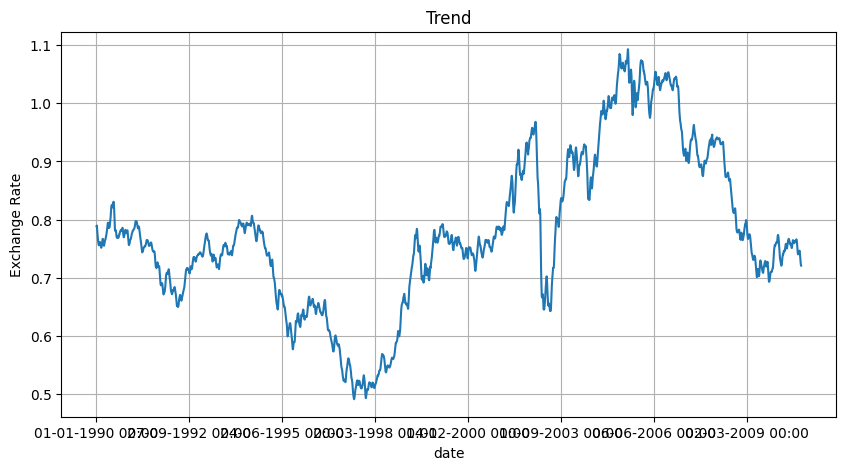

In [19]:
decompose.trend.plot(figsize=(10,5))
plt.title('Exchange Rate Trend')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.title('Trend')
plt.show()

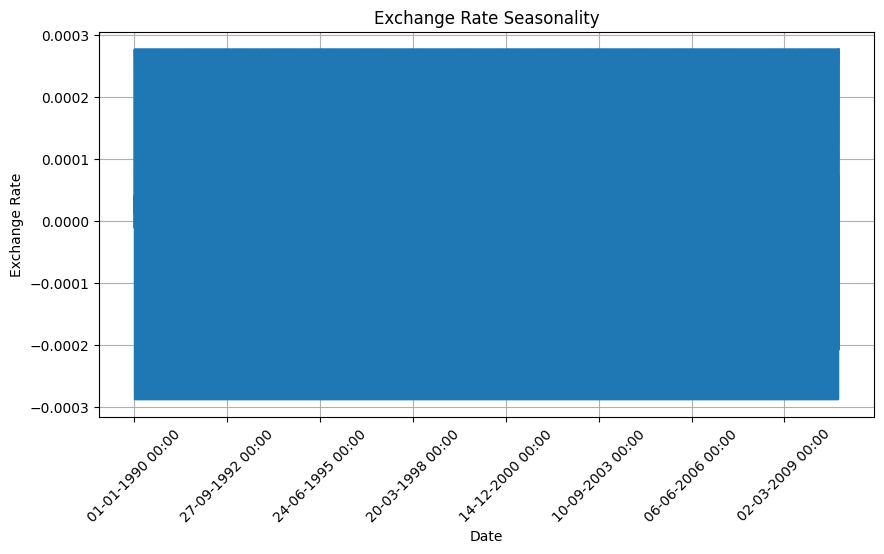

In [20]:
decompose.seasonal.plot(figsize=(10,5))
plt.title('Exchange Rate Seasonality')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

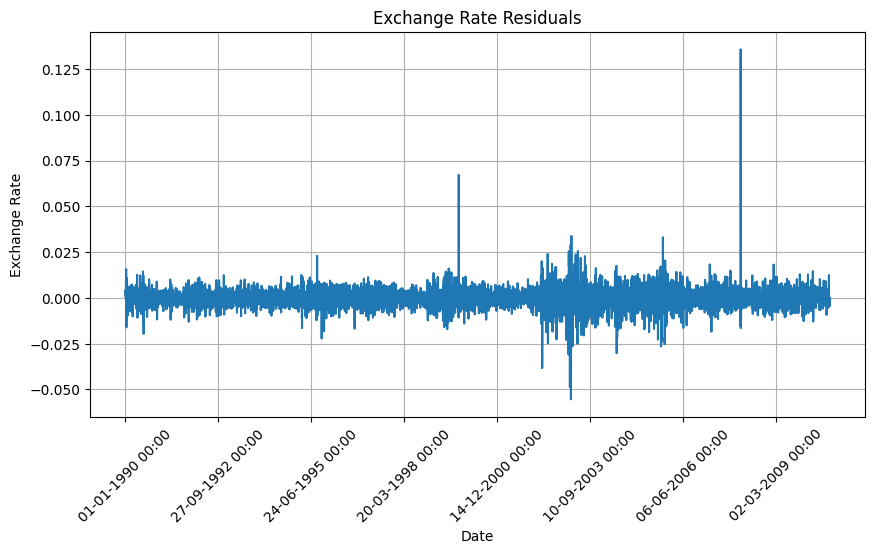

In [22]:
decompose.resid.plot(figsize=(10,5))
plt.title('Exchange Rate Residuals')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**ACF and PACF plots And ADFULLER model**

In [28]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Time series is not stationary.Differencing is needed")
    else:
        print("Time series is stationary.")

check_stationarity(df['Ex_rate'])

ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477
Time series is not stationary.Differencing is needed


In [30]:
data_diff=df['Ex_rate'].diff().dropna()
check_stationarity(data_diff)

ADF Statistic: -99.39343120118632
p-value: 0.0
Time series is stationary.


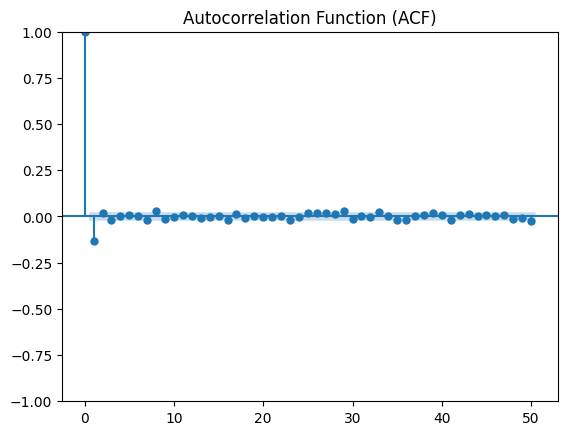

In [33]:
plot_acf(data_diff,lags=50,ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

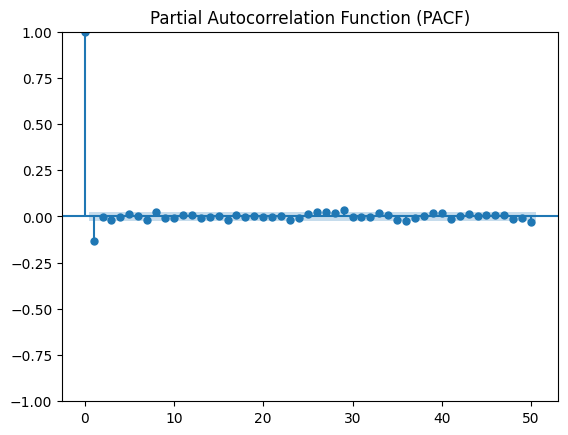

In [38]:
plot_pacf(data_diff,lags=50,ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

**ARIMA model**

In [40]:
model=ARIMA(df['Ex_rate'],order=(1,1,1))
arima_result=model_fit=model.fit()

In [41]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 30 Jun 2025   AIC                         -56102.322
Time:                        17:27:51   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

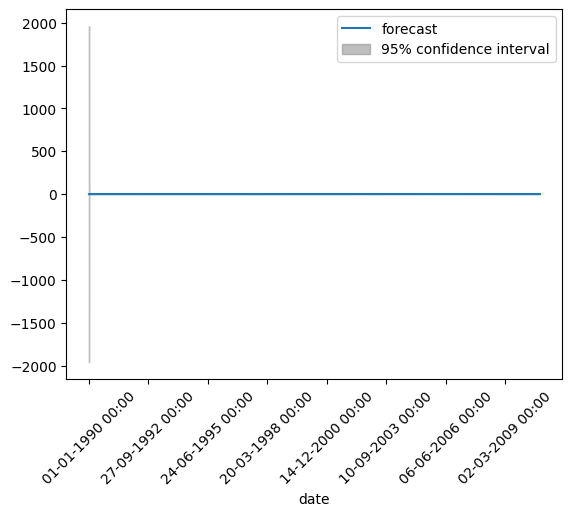

In [42]:
plot_predict(arima_result)
plt.xticks(rotation=45)
plt.show()

***EXponential Smoothing***

In [44]:
fitted_values=arima_result.fittedvalues
future=30
forecast=arima_result.forecast(steps=future)
future_dates = pd.date_range(df.index[-1], periods=future + 1, freq='D')[1:]

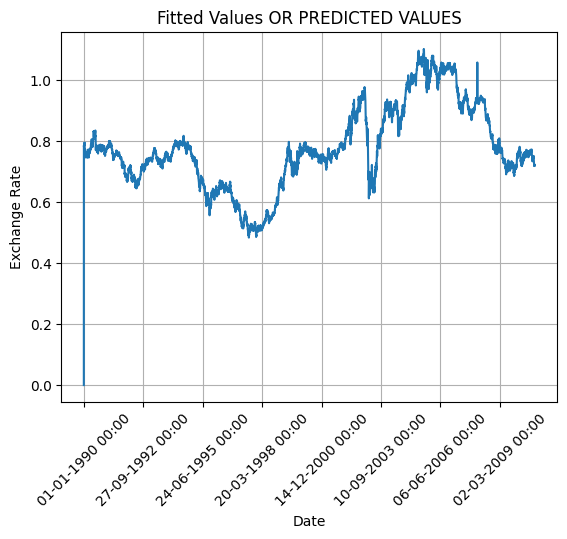

In [46]:
fitted_values.plot()
plt.title('Fitted Values OR PREDICTED VALUES')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

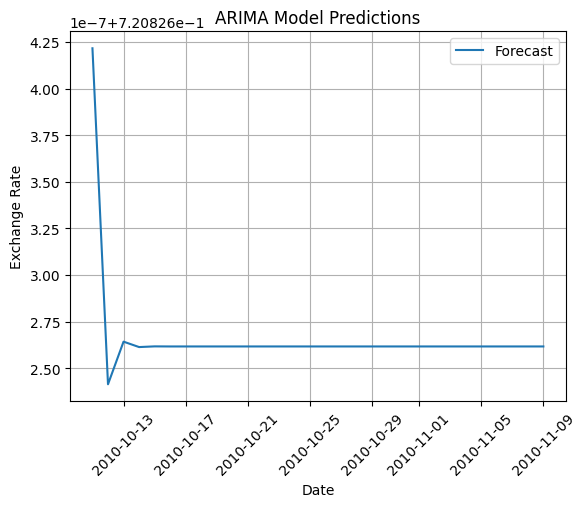

In [47]:
plt.plot(future_dates, forecast, label='Forecast')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()